In [269]:
!pip install wordcloud
!pip install gensim
!pip install nltk
from bs4 import BeautifulSoup
import requests
from lxml import html
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import gzip
import gensim 
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
liste=[]

for p_num in range(2,10):
    page = requests.get('https://www.dunyahalleri.com/category/haftanin-ozeti/page/{}'.format(p_num))
    for art in range(1,16):
        tree = html.fromstring(page.content)
        link = tree.xpath('//*[@id="content"]/div/div/div/div[2]/article[{}]/div/div[2]/div[1]/h2/a/@href'.format(art))
        
        detail = requests.get(link[0])
        detail_tree = html.fromstring(detail.content)
        post_code = str(tree.xpath('//*[@id="content"]/div/div/div/div[2]/article[{}]/@class'.format(art))[0]).split(' ')[1]
        
        
        
        header = detail_tree.xpath('//*[@id="{}"]/div/div/header/h1/text()'.format(post_code))
        
        st = tree.xpath('//*[@id="content"]/div/div/div/div[1]/div[1]/div/h1/text()')[0].lstrip('Kategori: ')
       
        time = detail_tree.xpath('//*[@id="{}"]/div/div/header/div/div[1]/span/text()'.format(post_code))
        
        p_count=1
        article_text = ''
        while True:
            count_link = 1
            text = detail_tree.xpath('//*[@id="{}"]/div/div/div/div[1]/div/p[{}]/text()'.format(post_code,p_count))
            a_list = []
            if len(text) != 0:
                while True:
                    text_in = detail_tree.xpath('//*[@id="{}"]/div/div/div/div[1]/div/p[{}]/a[{}]/text()'.format(post_code,p_count,count_link))
                    if len(text_in) == 0:
                        break
                    a_list.append(text_in[0])
                    count_link += 1
                    
                for i in range(len(text)):
                    try:
                        article_text += text[i] + a_list[i]
                    except:
                        article_text += text[i]
                p_count += 1
            else:
                break
        
        liste.append([link[0], header[0], article_text, st, time[0]])
data=pd.DataFrame(liste)
data.to_excel('data.xlsx')

In [420]:
data = data.dropna().reset_index(drop=True)
data.isnull().sum()
data

,0,1,2,3,4,count
0,https://www.dunyahalleri.com/haftanin-ozeti-233/,Haftanın Özeti: 233,dünya gündemine kurucuları arasında yer aldığı...,Haftanın Özeti,14/04/2019,195
1,https://www.dunyahalleri.com/haftanin-ozeti-232/,Haftanın Özeti: 232,haftanın türkiye adına en önemli gündem başlığ...,Haftanın Özeti,07/04/2019,108
2,https://www.dunyahalleri.com/haftanin-ozeti-231/,Haftanın Özeti: 231,salı günü yaptığı oylamada yeni saatleri kulla...,Haftanın Özeti,31/03/2019,60
3,https://www.dunyahalleri.com/haftanin-ozeti-230/,Haftanın Özeti: 230,geçen haftaya damgasını vuran yeni zelanda’dak...,Haftanın Özeti,24/03/2019,101
4,https://www.dunyahalleri.com/haftanin-ozeti-229/,Haftanın Özeti: 229,geçmiş haftanın en önemli iki gelişmesi mart’...,Haftanın Özeti,17/03/2019,90
5,https://www.dunyahalleri.com/haftanin-ozeti-228/,Haftanın Özeti: 228,"rekabet kurumu, perakende zincirlerine su ile ...",Haftanın Özeti,10/03/2019,76
6,https://www.dunyahalleri.com/haftanin-ozeti-227/,Haftanın Özeti: 227,kuzey kore lideri vurguladı. ve amerika birleş...,Haftanın Özeti,03/03/2019,63
7,https://www.dunyahalleri.com/haftanin-ozeti-226/,Haftanın Özeti: 226,"şubat akşamı, verirken bir deprem meydana gel...",Haftanın Özeti,24/02/2019,55
8,https://www.dunyahalleri.com/haftanin-ozeti-225/,Haftanın Özeti: 225,geride bıraktığımız haftayı muhtemelen gelen r...,Haftanın Özeti,17/02/2019,76
9,https://www.dunyahalleri.com/haftanin-ozeti-224/,Haftanın Özeti: 224,i̇stanbul’un sağ çıkarıldı. ilçesinde çarşamba...,Haftanın Özeti,10/02/2019,179


In [224]:
text = " ". join(i for i in data[2])

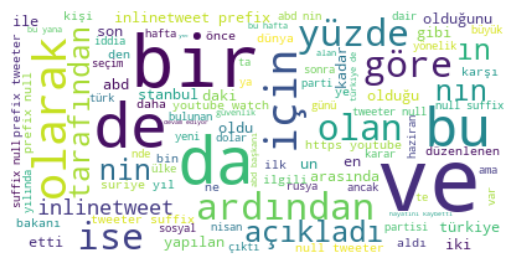

In [296]:
wordcloud = WordCloud(max_font_size = 70,
                     max_words = 100,
                     background_color = 'white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [275]:
import nltk

In [277]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ase\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [290]:

data[2] = data[2].str.lower()
data[2] = data[2].str.replace("\d","")


from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('trmodel', binary=True)

In [303]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
!pip install spacy
import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [304]:
data.shape

(120, 6)

In [306]:
data = data.dropna().reset_index(drop=True)
data.isnull().sum()
data

,0,1,2,3,4,count
0,https://www.dunyahalleri.com/haftanin-ozeti-233/,Haftanın Özeti: 233,dünya gündemine kurucuları arasında yer aldığı...,Haftanın Özeti,14/04/2019,195
1,https://www.dunyahalleri.com/haftanin-ozeti-232/,Haftanın Özeti: 232,haftanın türkiye adına en önemli gündem başlığ...,Haftanın Özeti,07/04/2019,108
2,https://www.dunyahalleri.com/haftanin-ozeti-231/,Haftanın Özeti: 231,salı günü yaptığı oylamada yeni saatleri kulla...,Haftanın Özeti,31/03/2019,60
3,https://www.dunyahalleri.com/haftanin-ozeti-230/,Haftanın Özeti: 230,geçen haftaya damgasını vuran yeni zelanda’dak...,Haftanın Özeti,24/03/2019,101
4,https://www.dunyahalleri.com/haftanin-ozeti-229/,Haftanın Özeti: 229,geçmiş haftanın en önemli iki gelişmesi mart’...,Haftanın Özeti,17/03/2019,90
5,https://www.dunyahalleri.com/haftanin-ozeti-228/,Haftanın Özeti: 228,"rekabet kurumu, perakende zincirlerine su ile ...",Haftanın Özeti,10/03/2019,76
6,https://www.dunyahalleri.com/haftanin-ozeti-227/,Haftanın Özeti: 227,kuzey kore lideri vurguladı. ve amerika birleş...,Haftanın Özeti,03/03/2019,63
7,https://www.dunyahalleri.com/haftanin-ozeti-226/,Haftanın Özeti: 226,"şubat akşamı, verirken bir deprem meydana gel...",Haftanın Özeti,24/02/2019,55
8,https://www.dunyahalleri.com/haftanin-ozeti-225/,Haftanın Özeti: 225,geride bıraktığımız haftayı muhtemelen gelen r...,Haftanın Özeti,17/02/2019,76
9,https://www.dunyahalleri.com/haftanin-ozeti-224/,Haftanın Özeti: 224,i̇stanbul’un sağ çıkarıldı. ilçesinde çarşamba...,Haftanın Özeti,10/02/2019,179


In [307]:
from gensim.models.phrases import Phrases, Phraser

In [408]:
#sent = [text.split(' ')]
sent = [row.split() for row in data[2]]
#burada text'i splitlediğimde 
print(sent)

[['dünya', 'gündemine', 'kurucuları', 'arasında', 'yer', 'aldığı', '(', 'yılında', 'hayata', 'geçen)', 'wikileaks', 'sitesiyle', 'gündeme', 'gelen', 'avustralyalı', 'julian', 'assange,', 'hakkında', 'çeşitli', 'ülkelerde', 'açılan', 'davalardan', 'korunmak', 'amacıyla', 'kaçak', 'hayatı', 'yaşamaya', 'başlamış', 've', 'izini', 'kaybettirmişti.', 'haziran', 'tarihinde', 'ekvador', 'dışişleri', 'bakanı', 'ricardo', 'patino', 'tarafından', 'yapılan', 'açıklamayla', 'assange’ın', 'londra’daki', 'ekvador', 'büyükelçiliği', 'binasına', 'girerek', 'siyasi', 'sığınma', 'talebinde', 'bulunduğu', 'ortaya', 'çıkmıştı.', 'o', 'günden', 'bu', 'yana', 'i̇ngiliz', 'emniyeti', 've', 'istihbarat', 'teşkilatı', 'elçilik', 'binası', 'çevresinde', '(', 'yılında', 'dahi', 'toplam', 'maliyeti', '‘u', 'aşan)', 'tarihin', 'en', 'yüksek', 'bütçeli', 'nöbetini', 'tutuyor', 've', 'assange’ın', 'kendilerine', 'teslim', 'edilmesini', 'talep', 'ediyordu.', 'aynı', 'dönemde', 'ekvador', 'da', 'yürütüyordu‘u', 'aşan'

In [409]:
phrases = Phrases(sent, min_count=3000, progress_per=10000)
bigram = Phraser(phrases)



2019-09-30 17:24:01,736 : INFO : collecting all words and their counts
2019-09-30 17:24:01,737 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-09-30 17:24:01,754 : INFO : collected 14476 word types from a corpus of 10165 words (unigram + bigrams) and 120 sentences
2019-09-30 17:24:01,755 : INFO : using 14476 counts as vocab in Phrases<0 vocab, min_count=3000, threshold=10.0, max_vocab_size=40000000>
2019-09-30 17:24:01,757 : INFO : source_vocab length 14476
2019-09-30 17:24:01,836 : INFO : Phraser built with 0 phrasegrams


In [381]:
sentences = bigram[sent]


[['dünya', 'gündemine', 'kurucuları', 'arasında', 'yer', 'aldığı', '(', 'yılında', 'hayata', 'geçen)', 'wikileaks', 'sitesiyle', 'gündeme', 'gelen', 'avustralyalı', 'julian', 'assange,', 'hakkında', 'çeşitli', 'ülkelerde', 'açılan', 'davalardan', 'korunmak', 'amacıyla', 'kaçak', 'hayatı', 'yaşamaya', 'başlamış', 've', 'izini', 'kaybettirmişti.', 'haziran', 'tarihinde', 'ekvador', 'dışişleri', 'bakanı', 'ricardo', 'patino', 'tarafından', 'yapılan', 'açıklamayla', 'assange’ın', 'londra’daki', 'ekvador', 'büyükelçiliği', 'binasına', 'girerek', 'siyasi', 'sığınma', 'talebinde', 'bulunduğu', 'ortaya', 'çıkmıştı.', 'o', 'günden', 'bu', 'yana', 'i̇ngiliz', 'emniyeti', 've', 'istihbarat', 'teşkilatı', 'elçilik', 'binası', 'çevresinde', '(', 'yılında', 'dahi', 'toplam', 'maliyeti', '‘u', 'aşan)', 'tarihin', 'en', 'yüksek', 'bütçeli', 'nöbetini', 'tutuyor', 've', 'assange’ın', 'kendilerine', 'teslim', 'edilmesini', 'talep', 'ediyordu.', 'aynı', 'dönemde', 'ekvador', 'da', 'yürütüyordu‘u', 'aşan'

In [421]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)
print(sent)

['bu', 'hafta', 'abd', 've', 'rusya', 'arasında', 'soğuk', 'savaş', 'günlerini', 'anımsatan', 'gelişmeler', 'yaşandı.', 'öncelikle', 'abd,', 'rusya’nın', 'siber', 'saldırılarda', 'bulunduğunu', 'iddia', 'ettiği', 'bildirildi', 'rus', 'diplomatın', 'sınır', 'dışı', 'edilmesine', 'karar', 'verdi.', 'ülkeyi', 'terk', 'etmeleri', 'için', 'saat', 'verilen', 'temsilcilerine', 'karşılık', 'rusya', '‘bu', 'karara', 'cevap', 'vereceğini’', '.']


In [411]:
sorted(word_freq, key=word_freq.get, reverse=True)[:20]

['ve',
 'bir',
 'bu',
 '.',
 'de',
 ',',
 'da',
 'yüzde',
 'olarak',
 'en',
 'için',
 'göre',
 'ardından',
 'ise',
 'olan',
 'tarafından',
 'başkanı',
 'hafta',
 '[inlinetweet',
 'yapılan']

In [412]:
import multiprocessing

from gensim.models import Word2Vec

In [413]:
cores = multiprocessing.cpu_count()

In [414]:
model1 = Word2Vec(min_count=20,
                     window=2,
                     size=300)

In [415]:
model1.build_vocab(sentences, progress_per=10000)


2019-09-30 17:24:16,063 : INFO : collecting all words and their counts
2019-09-30 17:24:16,065 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-30 17:24:16,103 : INFO : collected 5216 word types from a corpus of 10165 raw words and 120 sentences
2019-09-30 17:24:16,104 : INFO : Loading a fresh vocabulary
2019-09-30 17:24:16,106 : INFO : effective_min_count=20 retains 32 unique words (0% of original 5216, drops 5184)
2019-09-30 17:24:16,107 : INFO : effective_min_count=20 leaves 1610 word corpus (15% of original 10165, drops 8555)
2019-09-30 17:24:16,108 : INFO : deleting the raw counts dictionary of 5216 items
2019-09-30 17:24:16,108 : INFO : sample=0.001 downsamples 32 most-common words
2019-09-30 17:24:16,109 : INFO : downsampling leaves estimated 319 word corpus (19.9% of prior 1610)
2019-09-30 17:24:16,110 : INFO : estimated required memory for 32 words and 300 dimensions: 92800 bytes
2019-09-30 17:24:16,111 : INFO : resetting layer weights


In [422]:
model1.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

2019-09-30 18:09:58,257 : INFO : training model with 3 workers on 32 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=2
2019-09-30 18:09:58,288 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-30 18:09:58,289 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-30 18:09:58,289 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-30 18:09:58,290 : INFO : EPOCH - 1 : training on 10165 raw words (305 effective words) took 0.0s, 12476 effective words/s
2019-09-30 18:09:58,321 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-30 18:09:58,322 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-30 18:09:58,323 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-30 18:09:58,323 : INFO : EPOCH - 2 : training on 10165 raw words (312 effective words) took 0.0s, 12456 effective words/s
2019-09-30 18:09:58,349 : INFO : worker thread 

2019-09-30 18:09:58,914 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-30 18:09:58,915 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-30 18:09:58,916 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-30 18:09:58,916 : INFO : EPOCH - 21 : training on 10165 raw words (322 effective words) took 0.0s, 13738 effective words/s
2019-09-30 18:09:58,946 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-30 18:09:58,947 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-30 18:09:58,948 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-30 18:09:58,949 : INFO : EPOCH - 22 : training on 10165 raw words (332 effective words) took 0.0s, 13492 effective words/s
2019-09-30 18:09:58,979 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-30 18:09:58,980 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-30

(9721, 304950)

In [416]:
model1.init_sims(replace=True)

2019-09-30 17:24:22,357 : INFO : precomputing L2-norms of word weight vectors


In [417]:
print(sent)

['bu', 'hafta', 'abd', 've', 'rusya', 'arasında', 'soğuk', 'savaş', 'günlerini', 'anımsatan', 'gelişmeler', 'yaşandı.', 'öncelikle', 'abd,', 'rusya’nın', 'siber', 'saldırılarda', 'bulunduğunu', 'iddia', 'ettiği', 'bildirildi', 'rus', 'diplomatın', 'sınır', 'dışı', 'edilmesine', 'karar', 'verdi.', 'ülkeyi', 'terk', 'etmeleri', 'için', 'saat', 'verilen', 'temsilcilerine', 'karşılık', 'rusya', '‘bu', 'karara', 'cevap', 'vereceğini’', '.']
